Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:
* age — возраст
* sex — пол (1 - мужчина, 0 - женщина)
* cp — тип боли в груди (4 значения)
* trestbps — артериальное давление в покое
* chol — холестерин сыворотки в мг/дл
* fbs — уровень сахара в крови натощак > 120 мг/дл
* restecg — результаты электрокардиографии в покое (значения 0,1,2)
* thalach — достигнута максимальная частота сердечных сокращений
* exang — стенокардия, вызванная физической нагрузкой
* oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
* slope — наклон пикового сегмента ST при нагрузке
* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/heart.csv')
heart = df.copy()
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)
heart['old'].sum()

79

In [4]:
def norm(col):
    if col['sex'] == 1 and col['age']<=20:
        return int(123)
    if col['sex'] == 0 and col['age']<=20:
        return int(116)
    if col['sex'] == 1 and 21 <= col['age'] <= 30:
        return int(126)
    if col['sex'] == 0 and 21 <= col['age'] <= 30:
        return int(120)
    if col['sex'] == 1 and 31 <= col['age'] <= 40:
        return int(129)
    if col['sex'] == 0 and 31 <= col['age'] <= 40:
        return int(127)
    if col['sex'] == 1 and 41 <= col['age'] <= 50:
        return int(135)
    if col['sex'] == 0 and 41 <= col['age'] <= 50:
        return int(137)
    if col['sex'] == 1 and 51 <= col['age'] <= 60:
        return int(142)
    if col['sex'] == 0 and 51 <= col['age'] <= 60:
        return int(144)
    if col['sex'] == 1 and col['age'] >= 61:
        return int(142)
    if col['sex'] == 0 and col['age'] >= 61:
        return int(159)
    
heart['trestbps_mean'] = heart.apply(norm, axis=1)
heart['trestbps_mean'][300]

142

In [5]:
#Рабочий метод
"""age_intervals = pd.cut(heart.age, bins=[0, 20, 30, 40, 50, 60, np.inf])

trestbps_man = {0: 123, 1: 126, 2:129, 3:135, 4:142, 5:142}
trestbps_woman = {0: 116, 1: 120, 2:127, 3:137, 4:144, 5:169}

heart['trestbps_mean'] = 0
heart.loc[heart.sex == 1, 'trestbps_mean'] = age_intervals.cat.codes.astype(int).replace(trestbps_man)
heart.loc[heart.sex == 0, 'trestbps_mean'] = age_intervals.cat.codes.astype(int).replace(trestbps_woman)"""

"age_intervals = pd.cut(heart.age, bins=[0, 20, 30, 40, 50, 60, np.inf])\n\ntrestbps_man = {0: 123, 1: 126, 2:129, 3:135, 4:142, 5:142}\ntrestbps_woman = {0: 116, 1: 120, 2:127, 3:137, 4:144, 5:169}\n\nheart['trestbps_mean'] = 0\nheart.loc[heart.sex == 1, 'trestbps_mean'] = age_intervals.cat.codes.astype(int).replace(trestbps_man)\nheart.loc[heart.sex == 0, 'trestbps_mean'] = age_intervals.cat.codes.astype(int).replace(trestbps_woman)"

In [6]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, type_bin], axis=1)

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
"""r_scaler = preprocessing.RobustScaler()
heart['age'] = r_scaler.fit_transform(heart[['age']])
heart['oldpeak'] = r_scaler.fit_transform(heart[['oldpeak']])
heart.describe()"""

"r_scaler = preprocessing.RobustScaler()\nheart['age'] = r_scaler.fit_transform(heart[['age']])\nheart['oldpeak'] = r_scaler.fit_transform(heart[['oldpeak']])\nheart.describe()"

In [9]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart = r_scaler.fit_transform(heart)

heart = pd.DataFrame(heart, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


<AxesSubplot: >

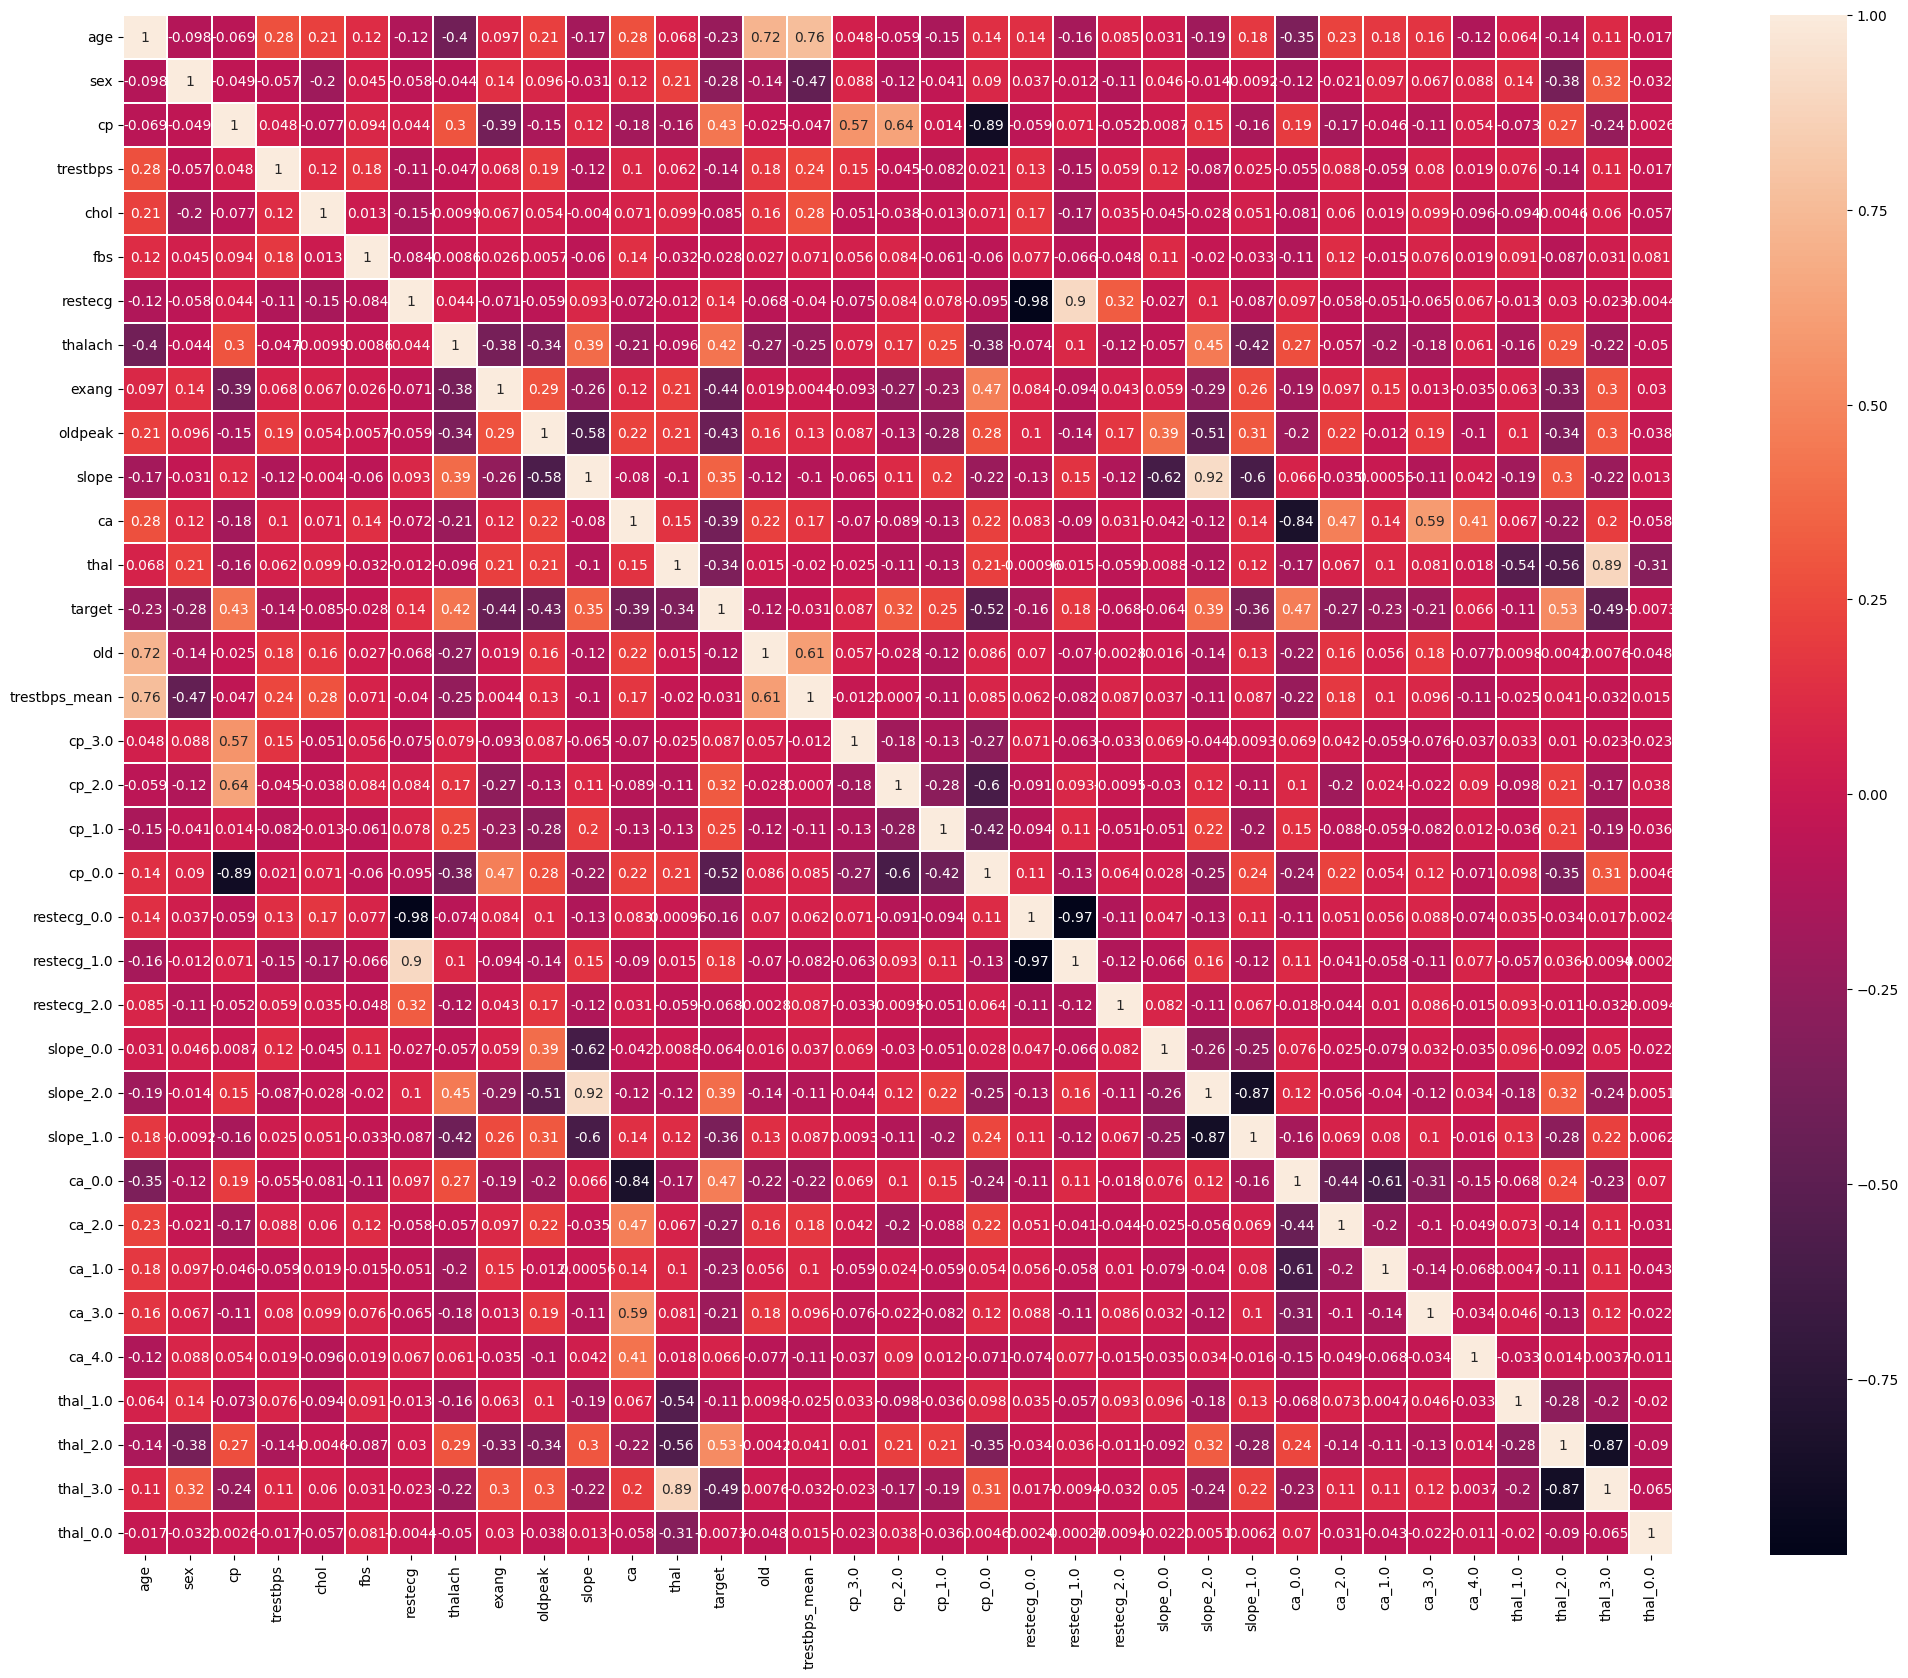

In [14]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(heart.corr(), annot=True, linewidths=.3, ax=ax)